# Invasion Percolation

The next percolation algorithm to be demonstrated is known as ``Invasion Percolation``. Instead of identifying connected clusters and invading them all in one go, as ``Ordinary Percolation`` does, this algorithm progresses one invasion step at a time. This is a more dynamic process and better simulates scenarios where instead of controlling the pressure at the network boundaries something else such as mass flow rate is controlled as the pressure is allowed to fluctuate up and down in order to meet the lowest available entry pressure for the growing cluster(s).

In [1]:
import sys
import openpnm as op
import numpy as np
np.random.seed(10)
import matplotlib.pyplot as plt
import porespy as ps
from ipywidgets import interact, IntSlider
from openpnm.topotools import trim
%matplotlib inline
ws = op.Workspace()
ws.settings["loglevel"] = 50

In order to also showcase some other network generation options we first start with a small 2D network with ``SpheresAndCylinders`` geometry.

In [2]:
spacing=2.5e-5
net = op.network.Cubic([20, 20, 1], spacing=spacing)
geo = op.geometry.SpheresAndCylinders(network=net, pores=net.Ps, throats=net.Ts)

We then trim all the surface pores to obtain disctint sets of boundary edge pores.

In [3]:
net.labels()
net.num_throats('surface')
trim(network=net, throats=net.throats('surface'))
h = net.check_network_health()
trim(network=net, pores=h['trim_pores'])

KeyError: 'trim_pores'

Then we use a function from our porespy package to generate a tomography style image of the abstract network providing the number of pixels in each dimension.

In [4]:
im = op.topotools.generate_voxel_image(net, max_dim=1000)

  0%|          | 0/400 [00:00<?, ?it/s]

 64%|██████▍   | 255/400 [00:00<00:00, 2547.71it/s]

100%|██████████| 400/400 [00:00<00:00, 2458.12it/s]

  0%|          | 0/684 [00:00<?, ?it/s]

  0%|          | 1/684 [00:00<01:16,  8.91it/s]

  0%|          | 2/684 [00:00<01:17,  8.78it/s]

  0%|          | 3/684 [00:00<01:18,  8.69it/s]

  1%|          | 4/684 [00:00<01:18,  8.65it/s]

  1%|          | 5/684 [00:00<01:18,  8.63it/s]

  1%|          | 6/684 [00:00<01:18,  8.63it/s]

  1%|          | 7/684 [00:00<01:18,  8.61it/s]

  1%|          | 8/684 [00:00<01:19,  8.54it/s]

  1%|▏         | 9/684 [00:01<01:18,  8.55it/s]

  1%|▏         | 10/684 [00:01<01:18,  8.57it/s]

  2%|▏         | 11/684 [00:01<01:18,  8.53it/s]

  2%|▏         | 12/684 [00:01<01:18,  8.54it/s]

  2%|▏         | 13/684 [00:01<01:18,  8.54it/s]

  2%|▏         | 14/684 [00:01<01:18,  8.48it/s]

  2%|▏         | 15/684 [00:01<01:19,  8.41it/s]

  2%|▏         | 16/684 [00:01<01:20,  8.34it/s]

  2%|▏         | 17/684 [00:01<01:20,  8.30it/s]

  3%|▎         | 18/684 [00:02<01:20,  8.29it/s]

  3%|▎         | 19/684 [00:02<01:19,  8.39it/s]

  3%|▎         | 20/684 [00:02<01:19,  8.38it/s]

  3%|▎         | 21/684 [00:02<01:19,  8.39it/s]

  3%|▎         | 22/684 [00:02<01:18,  8.46it/s]

  3%|▎         | 23/684 [00:02<01:17,  8.50it/s]

  4%|▎         | 24/684 [00:02<01:18,  8.45it/s]

  4%|▎         | 25/684 [00:02<01:18,  8.41it/s]

  4%|▍         | 26/684 [00:03<01:17,  8.44it/s]

  4%|▍         | 27/684 [00:03<01:17,  8.46it/s]

  4%|▍         | 28/684 [00:03<01:17,  8.50it/s]

  4%|▍         | 29/684 [00:03<01:16,  8.52it/s]

  4%|▍         | 30/684 [00:03<01:18,  8.38it/s]

  5%|▍         | 31/684 [00:03<01:17,  8.41it/s]

  5%|▍         | 32/684 [00:03<01:17,  8.43it/s]

  5%|▍         | 33/684 [00:03<01:16,  8.47it/s]

  5%|▍         | 34/684 [00:04<01:17,  8.44it/s]

  5%|▌         | 35/684 [00:04<01:16,  8.51it/s]

  5%|▌         | 36/684 [00:04<01:15,  8.54it/s]

  5%|▌         | 37/684 [00:04<01:15,  8.51it/s]

  6%|▌         | 38/684 [00:04<01:16,  8.49it/s]

  6%|▌         | 39/684 [00:04<01:16,  8.47it/s]

  6%|▌         | 40/684 [00:04<01:16,  8.41it/s]

  6%|▌         | 41/684 [00:04<01:16,  8.42it/s]

  6%|▌         | 42/684 [00:04<01:15,  8.51it/s]

  6%|▋         | 43/684 [00:05<01:14,  8.59it/s]

  6%|▋         | 44/684 [00:05<01:14,  8.61it/s]

  7%|▋         | 45/684 [00:05<01:13,  8.64it/s]

  7%|▋         | 46/684 [00:05<01:15,  8.48it/s]

  7%|▋         | 47/684 [00:05<01:16,  8.37it/s]

  7%|▋         | 48/684 [00:05<01:16,  8.34it/s]

  7%|▋         | 49/684 [00:05<01:15,  8.43it/s]

  7%|▋         | 50/684 [00:05<01:14,  8.52it/s]

  7%|▋         | 51/684 [00:06<01:13,  8.56it/s]

  8%|▊         | 52/684 [00:06<01:13,  8.62it/s]

  8%|▊         | 53/684 [00:06<01:13,  8.62it/s]

  8%|▊         | 54/684 [00:06<01:13,  8.54it/s]

  8%|▊         | 55/684 [00:06<01:13,  8.54it/s]

  8%|▊         | 56/684 [00:06<01:13,  8.53it/s]

  8%|▊         | 57/684 [00:06<01:13,  8.58it/s]

  8%|▊         | 58/684 [00:06<01:13,  8.51it/s]

  9%|▊         | 59/684 [00:06<01:13,  8.55it/s]

  9%|▉         | 60/684 [00:07<01:12,  8.55it/s]

  9%|▉         | 61/684 [00:07<01:13,  8.47it/s]

  9%|▉         | 62/684 [00:07<01:13,  8.52it/s]

  9%|▉         | 63/684 [00:07<01:12,  8.58it/s]

  9%|▉         | 64/684 [00:07<01:12,  8.60it/s]

 10%|▉         | 65/684 [00:07<01:12,  8.59it/s]

 10%|▉         | 66/684 [00:07<01:12,  8.58it/s]

 10%|▉         | 67/684 [00:07<01:11,  8.60it/s]

 10%|▉         | 68/684 [00:07<01:12,  8.50it/s]

 10%|█         | 69/684 [00:08<01:12,  8.50it/s]

 10%|█         | 70/684 [00:08<01:12,  8.50it/s]

 10%|█         | 71/684 [00:08<01:12,  8.48it/s]

 11%|█         | 72/684 [00:08<01:11,  8.50it/s]

 11%|█         | 73/684 [00:08<01:11,  8.54it/s]

 11%|█         | 74/684 [00:08<01:11,  8.55it/s]

 11%|█         | 75/684 [00:08<01:11,  8.51it/s]

 11%|█         | 76/684 [00:08<01:11,  8.47it/s]

 11%|█▏        | 77/684 [00:09<01:11,  8.45it/s]

 11%|█▏        | 78/684 [00:09<01:12,  8.40it/s]

 12%|█▏        | 79/684 [00:09<01:11,  8.47it/s]

 12%|█▏        | 80/684 [00:09<01:11,  8.51it/s]

 12%|█▏        | 81/684 [00:09<01:10,  8.56it/s]

 12%|█▏        | 82/684 [00:09<01:11,  8.47it/s]

 12%|█▏        | 83/684 [00:09<01:11,  8.45it/s]

 12%|█▏        | 84/684 [00:09<01:11,  8.40it/s]

 12%|█▏        | 85/684 [00:10<01:11,  8.36it/s]

 13%|█▎        | 86/684 [00:10<01:11,  8.33it/s]

 13%|█▎        | 87/684 [00:10<01:12,  8.25it/s]

 13%|█▎        | 88/684 [00:10<01:12,  8.27it/s]

 13%|█▎        | 89/684 [00:10<01:11,  8.28it/s]

 13%|█▎        | 90/684 [00:10<01:10,  8.41it/s]

 13%|█▎        | 91/684 [00:10<01:10,  8.44it/s]

 13%|█▎        | 92/684 [00:10<01:10,  8.44it/s]

 14%|█▎        | 93/684 [00:10<01:10,  8.43it/s]

 14%|█▎        | 94/684 [00:11<01:09,  8.49it/s]

 14%|█▍        | 95/684 [00:11<01:09,  8.53it/s]

 14%|█▍        | 96/684 [00:11<01:08,  8.56it/s]

 14%|█▍        | 97/684 [00:11<01:08,  8.58it/s]

 14%|█▍        | 98/684 [00:11<01:08,  8.54it/s]

 14%|█▍        | 99/684 [00:11<01:08,  8.51it/s]

 15%|█▍        | 100/684 [00:11<01:09,  8.44it/s]

 15%|█▍        | 101/684 [00:11<01:08,  8.50it/s]

 15%|█▍        | 102/684 [00:12<01:08,  8.52it/s]

 15%|█▌        | 103/684 [00:12<01:08,  8.48it/s]

 15%|█▌        | 104/684 [00:12<01:09,  8.39it/s]

 15%|█▌        | 105/684 [00:12<01:09,  8.34it/s]

 15%|█▌        | 106/684 [00:12<01:08,  8.42it/s]

 16%|█▌        | 107/684 [00:12<01:08,  8.46it/s]

 16%|█▌        | 108/684 [00:12<01:07,  8.51it/s]

 16%|█▌        | 109/684 [00:12<01:07,  8.57it/s]

 16%|█▌        | 110/684 [00:12<01:06,  8.62it/s]

 16%|█▌        | 111/684 [00:13<01:06,  8.66it/s]

 16%|█▋        | 112/684 [00:13<01:06,  8.60it/s]

 17%|█▋        | 113/684 [00:13<01:06,  8.54it/s]

 17%|█▋        | 114/684 [00:13<01:07,  8.45it/s]

 17%|█▋        | 115/684 [00:13<01:06,  8.52it/s]

 17%|█▋        | 116/684 [00:13<01:06,  8.54it/s]

 17%|█▋        | 117/684 [00:13<01:06,  8.59it/s]

 17%|█▋        | 118/684 [00:13<01:06,  8.50it/s]

 17%|█▋        | 119/684 [00:14<01:07,  8.43it/s]

 18%|█▊        | 120/684 [00:14<01:07,  8.41it/s]

 18%|█▊        | 121/684 [00:14<01:06,  8.42it/s]

 18%|█▊        | 122/684 [00:14<01:07,  8.38it/s]

 18%|█▊        | 123/684 [00:14<01:07,  8.35it/s]

 18%|█▊        | 124/684 [00:14<01:07,  8.32it/s]

 18%|█▊        | 125/684 [00:14<01:06,  8.45it/s]

 18%|█▊        | 126/684 [00:14<01:05,  8.49it/s]

 19%|█▊        | 127/684 [00:14<01:05,  8.51it/s]

 19%|█▊        | 128/684 [00:15<01:05,  8.55it/s]

 19%|█▉        | 129/684 [00:15<01:05,  8.49it/s]

 19%|█▉        | 130/684 [00:15<01:05,  8.41it/s]

 19%|█▉        | 131/684 [00:15<01:06,  8.32it/s]

 19%|█▉        | 132/684 [00:15<01:05,  8.37it/s]

 19%|█▉        | 133/684 [00:15<01:05,  8.44it/s]

 20%|█▉        | 134/684 [00:15<01:04,  8.53it/s]

 20%|█▉        | 135/684 [00:15<01:04,  8.49it/s]

 20%|█▉        | 136/684 [00:16<01:05,  8.42it/s]

 20%|██        | 137/684 [00:16<01:05,  8.38it/s]

 20%|██        | 138/684 [00:16<01:05,  8.33it/s]

 20%|██        | 139/684 [00:16<01:05,  8.37it/s]

 20%|██        | 140/684 [00:16<01:05,  8.36it/s]

 21%|██        | 141/684 [00:16<01:05,  8.28it/s]

 21%|██        | 142/684 [00:16<01:05,  8.34it/s]

 21%|██        | 143/684 [00:16<01:04,  8.39it/s]

 21%|██        | 144/684 [00:16<01:04,  8.41it/s]

 21%|██        | 145/684 [00:17<01:03,  8.47it/s]

 21%|██▏       | 146/684 [00:17<01:04,  8.40it/s]

 21%|██▏       | 147/684 [00:17<01:04,  8.31it/s]

 22%|██▏       | 148/684 [00:17<01:04,  8.33it/s]

 22%|██▏       | 149/684 [00:17<01:03,  8.42it/s]

 22%|██▏       | 150/684 [00:17<01:03,  8.47it/s]

 22%|██▏       | 151/684 [00:17<01:02,  8.54it/s]

 22%|██▏       | 152/684 [00:17<01:01,  8.60it/s]

 22%|██▏       | 153/684 [00:18<01:01,  8.61it/s]

 23%|██▎       | 154/684 [00:18<01:01,  8.55it/s]

 23%|██▎       | 155/684 [00:18<01:02,  8.46it/s]

 23%|██▎       | 156/684 [00:18<01:02,  8.44it/s]

 23%|██▎       | 157/684 [00:18<01:02,  8.41it/s]

 23%|██▎       | 158/684 [00:18<01:02,  8.37it/s]

 23%|██▎       | 159/684 [00:18<01:02,  8.36it/s]

 23%|██▎       | 160/684 [00:18<01:02,  8.32it/s]

 24%|██▎       | 161/684 [00:19<01:02,  8.41it/s]

 24%|██▎       | 162/684 [00:19<01:01,  8.45it/s]

 24%|██▍       | 163/684 [00:19<01:01,  8.44it/s]

 24%|██▍       | 164/684 [00:19<01:02,  8.39it/s]

 24%|██▍       | 165/684 [00:19<01:01,  8.40it/s]

 24%|██▍       | 166/684 [00:19<01:01,  8.38it/s]

 24%|██▍       | 167/684 [00:19<01:01,  8.37it/s]

 25%|██▍       | 168/684 [00:19<01:01,  8.36it/s]

 25%|██▍       | 169/684 [00:19<01:01,  8.36it/s]

 25%|██▍       | 170/684 [00:20<01:01,  8.42it/s]

 25%|██▌       | 171/684 [00:20<01:00,  8.50it/s]

 25%|██▌       | 172/684 [00:20<00:59,  8.53it/s]

 25%|██▌       | 173/684 [00:20<01:00,  8.48it/s]

 25%|██▌       | 174/684 [00:20<00:59,  8.52it/s]

 26%|██▌       | 175/684 [00:20<00:59,  8.55it/s]

 26%|██▌       | 176/684 [00:20<00:59,  8.55it/s]

 26%|██▌       | 177/684 [00:20<00:59,  8.56it/s]

 26%|██▌       | 178/684 [00:21<00:58,  8.58it/s]

 26%|██▌       | 179/684 [00:21<00:58,  8.62it/s]

 26%|██▋       | 180/684 [00:21<00:58,  8.58it/s]

 26%|██▋       | 181/684 [00:21<00:58,  8.60it/s]

 27%|██▋       | 182/684 [00:21<00:58,  8.57it/s]

 27%|██▋       | 183/684 [00:21<00:58,  8.55it/s]

 27%|██▋       | 184/684 [00:21<00:58,  8.55it/s]

 27%|██▋       | 185/684 [00:21<00:58,  8.48it/s]

 27%|██▋       | 186/684 [00:21<00:58,  8.46it/s]

 27%|██▋       | 187/684 [00:22<00:58,  8.47it/s]

 27%|██▋       | 188/684 [00:22<00:58,  8.49it/s]

 28%|██▊       | 189/684 [00:22<00:58,  8.52it/s]

 28%|██▊       | 190/684 [00:22<00:58,  8.50it/s]

 28%|██▊       | 191/684 [00:22<00:57,  8.51it/s]

 28%|██▊       | 192/684 [00:22<00:58,  8.47it/s]

 28%|██▊       | 193/684 [00:22<00:57,  8.48it/s]

 28%|██▊       | 194/684 [00:22<00:57,  8.48it/s]

 29%|██▊       | 195/684 [00:23<00:57,  8.50it/s]

 29%|██▊       | 196/684 [00:23<00:56,  8.58it/s]

 29%|██▉       | 197/684 [00:23<00:56,  8.62it/s]

 29%|██▉       | 198/684 [00:23<00:56,  8.62it/s]

 29%|██▉       | 199/684 [00:23<00:56,  8.62it/s]

 29%|██▉       | 200/684 [00:23<00:56,  8.61it/s]

 29%|██▉       | 201/684 [00:23<00:56,  8.56it/s]

 30%|██▉       | 202/684 [00:23<00:57,  8.45it/s]

 30%|██▉       | 203/684 [00:23<00:57,  8.42it/s]

 30%|██▉       | 204/684 [00:24<00:56,  8.49it/s]

 30%|██▉       | 205/684 [00:24<00:56,  8.53it/s]

 30%|███       | 206/684 [00:24<00:55,  8.57it/s]

 30%|███       | 207/684 [00:24<00:55,  8.62it/s]

 30%|███       | 208/684 [00:24<00:55,  8.62it/s]

 31%|███       | 209/684 [00:24<00:55,  8.61it/s]

 31%|███       | 210/684 [00:24<00:55,  8.53it/s]

 31%|███       | 211/684 [00:24<00:55,  8.56it/s]

 31%|███       | 212/684 [00:24<00:54,  8.59it/s]

 31%|███       | 213/684 [00:25<00:55,  8.54it/s]

 31%|███▏      | 214/684 [00:25<00:55,  8.50it/s]

 31%|███▏      | 215/684 [00:25<00:55,  8.46it/s]

 32%|███▏      | 216/684 [00:25<00:55,  8.38it/s]

 32%|███▏      | 217/684 [00:25<00:55,  8.43it/s]

 32%|███▏      | 218/684 [00:25<00:55,  8.40it/s]

 32%|███▏      | 219/684 [00:25<00:55,  8.40it/s]

 32%|███▏      | 220/684 [00:25<00:55,  8.39it/s]

 32%|███▏      | 221/684 [00:26<00:54,  8.48it/s]

 32%|███▏      | 222/684 [00:26<00:54,  8.52it/s]

 33%|███▎      | 223/684 [00:26<00:54,  8.49it/s]

 33%|███▎      | 224/684 [00:26<00:53,  8.53it/s]

 33%|███▎      | 225/684 [00:26<00:53,  8.58it/s]

 33%|███▎      | 226/684 [00:26<00:53,  8.60it/s]

 33%|███▎      | 227/684 [00:26<00:53,  8.62it/s]

 33%|███▎      | 228/684 [00:26<00:54,  8.44it/s]

 33%|███▎      | 229/684 [00:27<00:54,  8.34it/s]

 34%|███▎      | 230/684 [00:27<00:54,  8.36it/s]

 34%|███▍      | 231/684 [00:27<00:53,  8.42it/s]

 34%|███▍      | 232/684 [00:27<00:53,  8.47it/s]

 34%|███▍      | 233/684 [00:27<00:53,  8.50it/s]

 34%|███▍      | 234/684 [00:27<00:52,  8.55it/s]

 34%|███▍      | 235/684 [00:27<00:52,  8.58it/s]

 35%|███▍      | 236/684 [00:27<00:52,  8.56it/s]

 35%|███▍      | 237/684 [00:27<00:52,  8.51it/s]

 35%|███▍      | 238/684 [00:28<00:53,  8.40it/s]

 35%|███▍      | 239/684 [00:28<00:53,  8.33it/s]

 35%|███▌      | 240/684 [00:28<00:53,  8.28it/s]

 35%|███▌      | 241/684 [00:28<00:53,  8.32it/s]

 35%|███▌      | 242/684 [00:28<00:52,  8.38it/s]

 36%|███▌      | 243/684 [00:28<00:52,  8.34it/s]

 36%|███▌      | 244/684 [00:28<00:52,  8.36it/s]

 36%|███▌      | 245/684 [00:28<00:51,  8.45it/s]

 36%|███▌      | 246/684 [00:29<00:51,  8.50it/s]

 36%|███▌      | 247/684 [00:29<00:51,  8.47it/s]

 36%|███▋      | 248/684 [00:29<00:51,  8.42it/s]

 36%|███▋      | 249/684 [00:29<00:52,  8.36it/s]

 37%|███▋      | 250/684 [00:29<00:51,  8.38it/s]

 37%|███▋      | 251/684 [00:29<00:51,  8.36it/s]

 37%|███▋      | 252/684 [00:29<00:51,  8.34it/s]

 37%|███▋      | 253/684 [00:29<00:52,  8.23it/s]

 37%|███▋      | 254/684 [00:29<00:52,  8.27it/s]

 37%|███▋      | 255/684 [00:30<00:51,  8.26it/s]

 37%|███▋      | 256/684 [00:30<00:51,  8.29it/s]

 38%|███▊      | 257/684 [00:30<00:51,  8.31it/s]

 38%|███▊      | 258/684 [00:30<00:51,  8.27it/s]

 38%|███▊      | 259/684 [00:30<00:51,  8.26it/s]

 38%|███▊      | 260/684 [00:30<00:51,  8.27it/s]

 38%|███▊      | 261/684 [00:30<00:50,  8.29it/s]

 38%|███▊      | 262/684 [00:30<00:51,  8.22it/s]

 38%|███▊      | 263/684 [00:31<00:50,  8.29it/s]

 39%|███▊      | 264/684 [00:31<00:50,  8.31it/s]

 39%|███▊      | 265/684 [00:31<00:50,  8.34it/s]

 39%|███▉      | 266/684 [00:31<00:50,  8.30it/s]

 39%|███▉      | 267/684 [00:31<00:49,  8.35it/s]

 39%|███▉      | 268/684 [00:31<00:49,  8.38it/s]

 39%|███▉      | 269/684 [00:31<00:49,  8.31it/s]

 39%|███▉      | 270/684 [00:31<00:49,  8.28it/s]

 40%|███▉      | 271/684 [00:32<00:49,  8.28it/s]

 40%|███▉      | 272/684 [00:32<00:49,  8.33it/s]

 40%|███▉      | 273/684 [00:32<00:49,  8.36it/s]

 40%|████      | 274/684 [00:32<00:48,  8.41it/s]

 40%|████      | 275/684 [00:32<00:48,  8.46it/s]

 40%|████      | 276/684 [00:32<00:48,  8.46it/s]

 40%|████      | 277/684 [00:32<00:48,  8.39it/s]

 41%|████      | 278/684 [00:32<00:48,  8.30it/s]

 41%|████      | 279/684 [00:32<00:48,  8.39it/s]

 41%|████      | 280/684 [00:33<00:48,  8.40it/s]

 41%|████      | 281/684 [00:33<00:47,  8.42it/s]

 41%|████      | 282/684 [00:33<00:47,  8.43it/s]

 41%|████▏     | 283/684 [00:33<00:47,  8.46it/s]

 42%|████▏     | 284/684 [00:33<00:47,  8.41it/s]

 42%|████▏     | 285/684 [00:33<00:47,  8.32it/s]

 42%|████▏     | 286/684 [00:33<00:48,  8.29it/s]

 42%|████▏     | 287/684 [00:33<00:47,  8.28it/s]

 42%|████▏     | 288/684 [00:34<00:47,  8.27it/s]

 42%|████▏     | 289/684 [00:34<00:47,  8.33it/s]

 42%|████▏     | 290/684 [00:34<00:47,  8.36it/s]

 43%|████▎     | 291/684 [00:34<00:46,  8.37it/s]

 43%|████▎     | 292/684 [00:34<00:46,  8.41it/s]

 43%|████▎     | 293/684 [00:34<00:46,  8.45it/s]

 43%|████▎     | 294/684 [00:34<00:46,  8.44it/s]

 43%|████▎     | 295/684 [00:34<00:45,  8.47it/s]

 43%|████▎     | 296/684 [00:35<00:45,  8.48it/s]

 43%|████▎     | 297/684 [00:35<00:45,  8.51it/s]

 44%|████▎     | 298/684 [00:35<00:45,  8.49it/s]

 44%|████▎     | 299/684 [00:35<00:45,  8.38it/s]

 44%|████▍     | 300/684 [00:35<00:46,  8.26it/s]

 44%|████▍     | 301/684 [00:35<00:46,  8.22it/s]

 44%|████▍     | 302/684 [00:35<00:46,  8.15it/s]

 44%|████▍     | 303/684 [00:35<00:46,  8.14it/s]

 44%|████▍     | 304/684 [00:35<00:46,  8.22it/s]

 45%|████▍     | 305/684 [00:36<00:46,  8.16it/s]

 45%|████▍     | 306/684 [00:36<00:46,  8.09it/s]

 45%|████▍     | 307/684 [00:36<00:46,  8.13it/s]

 45%|████▌     | 308/684 [00:36<00:46,  8.14it/s]

 45%|████▌     | 309/684 [00:36<00:45,  8.17it/s]

 45%|████▌     | 310/684 [00:36<00:45,  8.21it/s]

 45%|████▌     | 311/684 [00:36<00:45,  8.22it/s]

 46%|████▌     | 312/684 [00:36<00:45,  8.22it/s]

 46%|████▌     | 313/684 [00:37<00:44,  8.30it/s]

 46%|████▌     | 314/684 [00:37<00:44,  8.34it/s]

 46%|████▌     | 315/684 [00:37<00:44,  8.31it/s]

 46%|████▌     | 316/684 [00:37<00:44,  8.28it/s]

 46%|████▋     | 317/684 [00:37<00:44,  8.26it/s]

 46%|████▋     | 318/684 [00:37<00:44,  8.31it/s]

 47%|████▋     | 319/684 [00:37<00:43,  8.32it/s]

 47%|████▋     | 320/684 [00:37<00:43,  8.29it/s]

 47%|████▋     | 321/684 [00:38<00:43,  8.25it/s]

 47%|████▋     | 322/684 [00:38<00:44,  8.18it/s]

 47%|████▋     | 323/684 [00:38<00:43,  8.25it/s]

 47%|████▋     | 324/684 [00:38<00:43,  8.24it/s]

 48%|████▊     | 325/684 [00:38<00:43,  8.26it/s]

 48%|████▊     | 326/684 [00:38<00:43,  8.28it/s]

 48%|████▊     | 327/684 [00:38<00:42,  8.33it/s]

 48%|████▊     | 328/684 [00:38<00:43,  8.28it/s]

 48%|████▊     | 329/684 [00:39<00:43,  8.23it/s]

 48%|████▊     | 330/684 [00:39<00:43,  8.20it/s]

 48%|████▊     | 331/684 [00:39<00:43,  8.16it/s]

 49%|████▊     | 332/684 [00:39<00:43,  8.15it/s]

 49%|████▊     | 333/684 [00:39<00:43,  8.11it/s]

 49%|████▉     | 334/684 [00:39<00:43,  8.07it/s]

 49%|████▉     | 335/684 [00:39<00:42,  8.19it/s]

 49%|████▉     | 336/684 [00:39<00:41,  8.31it/s]

 49%|████▉     | 337/684 [00:39<00:41,  8.41it/s]

 49%|████▉     | 338/684 [00:40<00:41,  8.36it/s]

 50%|████▉     | 339/684 [00:40<00:40,  8.42it/s]

 50%|████▉     | 340/684 [00:40<00:40,  8.44it/s]

 50%|████▉     | 341/684 [00:40<00:40,  8.41it/s]

 50%|█████     | 342/684 [00:40<00:40,  8.36it/s]

 50%|█████     | 343/684 [00:40<00:40,  8.44it/s]

 50%|█████     | 344/684 [00:40<00:40,  8.34it/s]

 50%|█████     | 345/684 [00:40<00:40,  8.40it/s]

 51%|█████     | 346/684 [00:41<00:40,  8.36it/s]

 51%|█████     | 347/684 [00:41<00:40,  8.42it/s]

 51%|█████     | 348/684 [00:41<00:39,  8.45it/s]

 51%|█████     | 349/684 [00:41<00:39,  8.42it/s]

 51%|█████     | 350/684 [00:41<00:39,  8.38it/s]

 51%|█████▏    | 351/684 [00:41<00:39,  8.46it/s]

 51%|█████▏    | 352/684 [00:41<00:39,  8.50it/s]

 52%|█████▏    | 353/684 [00:41<00:39,  8.47it/s]

 52%|█████▏    | 354/684 [00:41<00:38,  8.50it/s]

 52%|█████▏    | 355/684 [00:42<00:38,  8.47it/s]

 52%|█████▏    | 356/684 [00:42<00:38,  8.47it/s]

 52%|█████▏    | 357/684 [00:42<00:38,  8.43it/s]

 52%|█████▏    | 358/684 [00:42<00:38,  8.44it/s]

 52%|█████▏    | 359/684 [00:42<00:38,  8.49it/s]

 53%|█████▎    | 360/684 [00:42<00:38,  8.40it/s]

 53%|█████▎    | 361/684 [00:42<00:38,  8.45it/s]

 53%|█████▎    | 362/684 [00:42<00:38,  8.35it/s]

 53%|█████▎    | 363/684 [00:43<00:38,  8.41it/s]

 53%|█████▎    | 364/684 [00:43<00:38,  8.37it/s]

 53%|█████▎    | 365/684 [00:43<00:37,  8.41it/s]

 54%|█████▎    | 366/684 [00:43<00:37,  8.44it/s]

 54%|█████▎    | 367/684 [00:43<00:37,  8.49it/s]

 54%|█████▍    | 368/684 [00:43<00:37,  8.49it/s]

 54%|█████▍    | 369/684 [00:43<00:36,  8.55it/s]

 54%|█████▍    | 370/684 [00:43<00:37,  8.45it/s]

 54%|█████▍    | 371/684 [00:44<00:37,  8.41it/s]

 54%|█████▍    | 372/684 [00:44<00:36,  8.44it/s]

 55%|█████▍    | 373/684 [00:44<00:36,  8.47it/s]

 55%|█████▍    | 374/684 [00:44<00:36,  8.44it/s]

 55%|█████▍    | 375/684 [00:44<00:36,  8.43it/s]

 55%|█████▍    | 376/684 [00:44<00:36,  8.48it/s]

 55%|█████▌    | 377/684 [00:44<00:36,  8.49it/s]

 55%|█████▌    | 378/684 [00:44<00:36,  8.45it/s]

 55%|█████▌    | 379/684 [00:44<00:36,  8.45it/s]

 56%|█████▌    | 380/684 [00:45<00:36,  8.42it/s]

 56%|█████▌    | 381/684 [00:45<00:35,  8.52it/s]

 56%|█████▌    | 382/684 [00:45<00:35,  8.58it/s]

 56%|█████▌    | 383/684 [00:45<00:35,  8.56it/s]

 56%|█████▌    | 384/684 [00:45<00:35,  8.57it/s]

 56%|█████▋    | 385/684 [00:45<00:34,  8.57it/s]

 56%|█████▋    | 386/684 [00:45<00:34,  8.56it/s]

 57%|█████▋    | 387/684 [00:45<00:34,  8.61it/s]

 57%|█████▋    | 388/684 [00:46<00:34,  8.57it/s]

 57%|█████▋    | 389/684 [00:46<00:34,  8.65it/s]

 57%|█████▋    | 390/684 [00:46<00:33,  8.66it/s]

 57%|█████▋    | 391/684 [00:46<00:33,  8.67it/s]

 57%|█████▋    | 392/684 [00:46<00:33,  8.65it/s]

 57%|█████▋    | 393/684 [00:46<00:33,  8.63it/s]

 58%|█████▊    | 394/684 [00:46<00:33,  8.63it/s]

 58%|█████▊    | 395/684 [00:46<00:33,  8.65it/s]

 58%|█████▊    | 396/684 [00:46<00:33,  8.62it/s]

 58%|█████▊    | 397/684 [00:47<00:33,  8.54it/s]

 58%|█████▊    | 398/684 [00:47<00:33,  8.55it/s]

 58%|█████▊    | 399/684 [00:47<00:33,  8.50it/s]

 58%|█████▊    | 400/684 [00:47<00:33,  8.54it/s]

 59%|█████▊    | 401/684 [00:47<00:32,  8.58it/s]

 59%|█████▉    | 402/684 [00:47<00:32,  8.56it/s]

 59%|█████▉    | 403/684 [00:47<00:32,  8.62it/s]

 59%|█████▉    | 404/684 [00:47<00:32,  8.53it/s]

 59%|█████▉    | 405/684 [00:47<00:32,  8.58it/s]

 59%|█████▉    | 406/684 [00:48<00:32,  8.49it/s]

 60%|█████▉    | 407/684 [00:48<00:32,  8.54it/s]

 60%|█████▉    | 408/684 [00:48<00:32,  8.50it/s]

 60%|█████▉    | 409/684 [00:48<00:32,  8.56it/s]

 60%|█████▉    | 410/684 [00:48<00:32,  8.55it/s]

 60%|██████    | 411/684 [00:48<00:31,  8.63it/s]

 60%|██████    | 412/684 [00:48<00:31,  8.66it/s]

 60%|██████    | 413/684 [00:48<00:31,  8.69it/s]

 61%|██████    | 414/684 [00:49<00:31,  8.62it/s]

 61%|██████    | 415/684 [00:49<00:31,  8.56it/s]

 61%|██████    | 416/684 [00:49<00:31,  8.59it/s]

 61%|██████    | 417/684 [00:49<00:31,  8.55it/s]

 61%|██████    | 418/684 [00:49<00:31,  8.54it/s]

 61%|██████▏   | 419/684 [00:49<00:30,  8.60it/s]

 61%|██████▏   | 420/684 [00:49<00:30,  8.65it/s]

 62%|██████▏   | 421/684 [00:49<00:30,  8.70it/s]

 62%|██████▏   | 422/684 [00:49<00:30,  8.62it/s]

 62%|██████▏   | 423/684 [00:50<00:30,  8.60it/s]

 62%|██████▏   | 424/684 [00:50<00:30,  8.42it/s]

 62%|██████▏   | 425/684 [00:50<00:31,  8.30it/s]

 62%|██████▏   | 426/684 [00:50<00:31,  8.31it/s]

 62%|██████▏   | 427/684 [00:50<00:30,  8.42it/s]

 63%|██████▎   | 428/684 [00:50<00:30,  8.51it/s]

 63%|██████▎   | 429/684 [00:50<00:29,  8.57it/s]

 63%|██████▎   | 430/684 [00:50<00:29,  8.61it/s]

 63%|██████▎   | 431/684 [00:51<00:29,  8.58it/s]

 63%|██████▎   | 432/684 [00:51<00:29,  8.60it/s]

 63%|██████▎   | 433/684 [00:51<00:29,  8.55it/s]

 63%|██████▎   | 434/684 [00:51<00:29,  8.54it/s]

 64%|██████▎   | 435/684 [00:51<00:29,  8.55it/s]

 64%|██████▎   | 436/684 [00:51<00:29,  8.55it/s]

 64%|██████▍   | 437/684 [00:51<00:28,  8.53it/s]

 64%|██████▍   | 438/684 [00:51<00:28,  8.55it/s]

 64%|██████▍   | 439/684 [00:51<00:28,  8.53it/s]

 64%|██████▍   | 440/684 [00:52<00:28,  8.44it/s]

 64%|██████▍   | 441/684 [00:52<00:28,  8.44it/s]

 65%|██████▍   | 442/684 [00:52<00:28,  8.36it/s]

 65%|██████▍   | 443/684 [00:52<00:28,  8.40it/s]

 65%|██████▍   | 444/684 [00:52<00:28,  8.41it/s]

 65%|██████▌   | 445/684 [00:52<00:28,  8.43it/s]

 65%|██████▌   | 446/684 [00:52<00:28,  8.47it/s]

 65%|██████▌   | 447/684 [00:52<00:27,  8.51it/s]

 65%|██████▌   | 448/684 [00:53<00:27,  8.45it/s]

 66%|██████▌   | 449/684 [00:53<00:27,  8.41it/s]

 66%|██████▌   | 450/684 [00:53<00:27,  8.50it/s]

 66%|██████▌   | 451/684 [00:53<00:27,  8.52it/s]

 66%|██████▌   | 452/684 [00:53<00:27,  8.56it/s]

 66%|██████▌   | 453/684 [00:53<00:27,  8.47it/s]

 66%|██████▋   | 454/684 [00:53<00:27,  8.43it/s]

 67%|██████▋   | 455/684 [00:53<00:27,  8.44it/s]

 67%|██████▋   | 456/684 [00:53<00:26,  8.52it/s]

 67%|██████▋   | 457/684 [00:54<00:26,  8.55it/s]

 67%|██████▋   | 458/684 [00:54<00:26,  8.47it/s]

 67%|██████▋   | 459/684 [00:54<00:26,  8.41it/s]

 67%|██████▋   | 460/684 [00:54<00:26,  8.33it/s]

 67%|██████▋   | 461/684 [00:54<00:26,  8.46it/s]

 68%|██████▊   | 462/684 [00:54<00:26,  8.53it/s]

 68%|██████▊   | 463/684 [00:54<00:25,  8.63it/s]

 68%|██████▊   | 464/684 [00:54<00:25,  8.53it/s]

 68%|██████▊   | 465/684 [00:55<00:25,  8.58it/s]

 68%|██████▊   | 466/684 [00:55<00:25,  8.51it/s]

 68%|██████▊   | 467/684 [00:55<00:25,  8.52it/s]

 68%|██████▊   | 468/684 [00:55<00:25,  8.53it/s]

 69%|██████▊   | 469/684 [00:55<00:25,  8.44it/s]

 69%|██████▊   | 470/684 [00:55<00:25,  8.50it/s]

 69%|██████▉   | 471/684 [00:55<00:25,  8.45it/s]

 69%|██████▉   | 472/684 [00:55<00:25,  8.44it/s]

 69%|██████▉   | 473/684 [00:55<00:25,  8.43it/s]

 69%|██████▉   | 474/684 [00:56<00:24,  8.43it/s]

 69%|██████▉   | 475/684 [00:56<00:24,  8.45it/s]

 70%|██████▉   | 476/684 [00:56<00:24,  8.39it/s]

 70%|██████▉   | 477/684 [00:56<00:24,  8.47it/s]

 70%|██████▉   | 478/684 [00:56<00:24,  8.46it/s]

 70%|███████   | 479/684 [00:56<00:24,  8.54it/s]

 70%|███████   | 480/684 [00:56<00:24,  8.45it/s]

 70%|███████   | 481/684 [00:56<00:23,  8.51it/s]

 70%|███████   | 482/684 [00:57<00:23,  8.44it/s]

 71%|███████   | 483/684 [00:57<00:23,  8.43it/s]

 71%|███████   | 484/684 [00:57<00:23,  8.52it/s]

 71%|███████   | 485/684 [00:57<00:23,  8.48it/s]

 71%|███████   | 486/684 [00:57<00:23,  8.55it/s]

 71%|███████   | 487/684 [00:57<00:23,  8.47it/s]

 71%|███████▏  | 488/684 [00:57<00:23,  8.45it/s]

 71%|███████▏  | 489/684 [00:57<00:23,  8.37it/s]

 72%|███████▏  | 490/684 [00:57<00:23,  8.38it/s]

 72%|███████▏  | 491/684 [00:58<00:22,  8.39it/s]

 72%|███████▏  | 492/684 [00:58<00:22,  8.38it/s]

 72%|███████▏  | 493/684 [00:58<00:22,  8.33it/s]

 72%|███████▏  | 494/684 [00:58<00:23,  8.26it/s]

 72%|███████▏  | 495/684 [00:58<00:22,  8.37it/s]

 73%|███████▎  | 496/684 [00:58<00:22,  8.40it/s]

 73%|███████▎  | 497/684 [00:58<00:22,  8.48it/s]

 73%|███████▎  | 498/684 [00:58<00:22,  8.38it/s]

 73%|███████▎  | 499/684 [00:59<00:22,  8.40it/s]

 73%|███████▎  | 500/684 [00:59<00:21,  8.40it/s]

 73%|███████▎  | 501/684 [00:59<00:21,  8.39it/s]

 73%|███████▎  | 502/684 [00:59<00:21,  8.44it/s]

 74%|███████▎  | 503/684 [00:59<00:21,  8.45it/s]

 74%|███████▎  | 504/684 [00:59<00:21,  8.48it/s]

 74%|███████▍  | 505/684 [00:59<00:21,  8.40it/s]

 74%|███████▍  | 506/684 [00:59<00:21,  8.41it/s]

 74%|███████▍  | 507/684 [01:00<00:20,  8.51it/s]

 74%|███████▍  | 508/684 [01:00<00:20,  8.53it/s]

 74%|███████▍  | 509/684 [01:00<00:20,  8.57it/s]

 75%|███████▍  | 510/684 [01:00<00:20,  8.58it/s]

 75%|███████▍  | 511/684 [01:00<00:20,  8.60it/s]

 75%|███████▍  | 512/684 [01:00<00:20,  8.56it/s]

 75%|███████▌  | 513/684 [01:00<00:19,  8.63it/s]

 75%|███████▌  | 514/684 [01:00<00:19,  8.63it/s]

 75%|███████▌  | 515/684 [01:00<00:19,  8.64it/s]

 75%|███████▌  | 516/684 [01:01<00:19,  8.65it/s]

 76%|███████▌  | 517/684 [01:01<00:19,  8.62it/s]

 76%|███████▌  | 518/684 [01:01<00:19,  8.55it/s]

 76%|███████▌  | 519/684 [01:01<00:19,  8.56it/s]

 76%|███████▌  | 520/684 [01:01<00:19,  8.54it/s]

 76%|███████▌  | 521/684 [01:01<00:19,  8.58it/s]

 76%|███████▋  | 522/684 [01:01<00:18,  8.63it/s]

 76%|███████▋  | 523/684 [01:01<00:18,  8.54it/s]

 77%|███████▋  | 524/684 [01:01<00:18,  8.52it/s]

 77%|███████▋  | 525/684 [01:02<00:18,  8.62it/s]

 77%|███████▋  | 526/684 [01:02<00:18,  8.65it/s]

 77%|███████▋  | 527/684 [01:02<00:18,  8.68it/s]

 77%|███████▋  | 528/684 [01:02<00:18,  8.66it/s]

 77%|███████▋  | 529/684 [01:02<00:17,  8.69it/s]

 77%|███████▋  | 530/684 [01:02<00:17,  8.71it/s]

 78%|███████▊  | 531/684 [01:02<00:17,  8.74it/s]

 78%|███████▊  | 532/684 [01:02<00:17,  8.73it/s]

 78%|███████▊  | 533/684 [01:03<00:17,  8.70it/s]

 78%|███████▊  | 534/684 [01:03<00:17,  8.71it/s]

 78%|███████▊  | 535/684 [01:03<00:17,  8.63it/s]

 78%|███████▊  | 536/684 [01:03<00:17,  8.67it/s]

 79%|███████▊  | 537/684 [01:03<00:16,  8.66it/s]

 79%|███████▊  | 538/684 [01:03<00:16,  8.62it/s]

 79%|███████▉  | 539/684 [01:03<00:16,  8.67it/s]

 79%|███████▉  | 540/684 [01:03<00:16,  8.63it/s]

 79%|███████▉  | 541/684 [01:03<00:16,  8.54it/s]

 79%|███████▉  | 542/684 [01:04<00:16,  8.57it/s]

 79%|███████▉  | 543/684 [01:04<00:16,  8.61it/s]

 80%|███████▉  | 544/684 [01:04<00:16,  8.63it/s]

 80%|███████▉  | 545/684 [01:04<00:16,  8.60it/s]

 80%|███████▉  | 546/684 [01:04<00:16,  8.61it/s]

 80%|███████▉  | 547/684 [01:04<00:15,  8.68it/s]

 80%|████████  | 548/684 [01:04<00:15,  8.71it/s]

 80%|████████  | 549/684 [01:04<00:15,  8.72it/s]

 80%|████████  | 550/684 [01:04<00:15,  8.61it/s]

 81%|████████  | 551/684 [01:05<00:15,  8.55it/s]

 81%|████████  | 552/684 [01:05<00:15,  8.57it/s]

 81%|████████  | 553/684 [01:05<00:15,  8.45it/s]

 81%|████████  | 554/684 [01:05<00:15,  8.52it/s]

 81%|████████  | 555/684 [01:05<00:15,  8.56it/s]

 81%|████████▏ | 556/684 [01:05<00:15,  8.48it/s]

 81%|████████▏ | 557/684 [01:05<00:14,  8.51it/s]

 82%|████████▏ | 558/684 [01:05<00:14,  8.45it/s]

 82%|████████▏ | 559/684 [01:06<00:14,  8.44it/s]

 82%|████████▏ | 560/684 [01:06<00:14,  8.49it/s]

 82%|████████▏ | 561/684 [01:06<00:14,  8.47it/s]

 82%|████████▏ | 562/684 [01:06<00:14,  8.49it/s]

 82%|████████▏ | 563/684 [01:06<00:14,  8.49it/s]

 82%|████████▏ | 564/684 [01:06<00:14,  8.54it/s]

 83%|████████▎ | 565/684 [01:06<00:13,  8.54it/s]

 83%|████████▎ | 566/684 [01:06<00:13,  8.49it/s]

 83%|████████▎ | 567/684 [01:06<00:13,  8.45it/s]

 83%|████████▎ | 568/684 [01:07<00:13,  8.42it/s]

 83%|████████▎ | 569/684 [01:07<00:13,  8.41it/s]

 83%|████████▎ | 570/684 [01:07<00:13,  8.45it/s]

 83%|████████▎ | 571/684 [01:07<00:13,  8.52it/s]

 84%|████████▎ | 572/684 [01:07<00:13,  8.48it/s]

 84%|████████▍ | 573/684 [01:07<00:12,  8.55it/s]

 84%|████████▍ | 574/684 [01:07<00:12,  8.47it/s]

 84%|████████▍ | 575/684 [01:07<00:12,  8.48it/s]

 84%|████████▍ | 576/684 [01:08<00:12,  8.46it/s]

 84%|████████▍ | 577/684 [01:08<00:12,  8.39it/s]

 85%|████████▍ | 578/684 [01:08<00:12,  8.44it/s]

 85%|████████▍ | 579/684 [01:08<00:12,  8.42it/s]

 85%|████████▍ | 580/684 [01:08<00:12,  8.42it/s]

 85%|████████▍ | 581/684 [01:08<00:12,  8.37it/s]

 85%|████████▌ | 582/684 [01:08<00:12,  8.40it/s]

 85%|████████▌ | 583/684 [01:08<00:11,  8.45it/s]

 85%|████████▌ | 584/684 [01:09<00:11,  8.47it/s]

 86%|████████▌ | 585/684 [01:09<00:11,  8.54it/s]

 86%|████████▌ | 586/684 [01:09<00:11,  8.47it/s]

 86%|████████▌ | 587/684 [01:09<00:11,  8.42it/s]

 86%|████████▌ | 588/684 [01:09<00:11,  8.38it/s]

 86%|████████▌ | 589/684 [01:09<00:11,  8.44it/s]

 86%|████████▋ | 590/684 [01:09<00:11,  8.41it/s]

 86%|████████▋ | 591/684 [01:09<00:11,  8.36it/s]

 87%|████████▋ | 592/684 [01:09<00:10,  8.47it/s]

 87%|████████▋ | 593/684 [01:10<00:10,  8.48it/s]

 87%|████████▋ | 594/684 [01:10<00:10,  8.43it/s]

 87%|████████▋ | 595/684 [01:10<00:10,  8.47it/s]

 87%|████████▋ | 596/684 [01:10<00:10,  8.39it/s]

 87%|████████▋ | 597/684 [01:10<00:10,  8.38it/s]

 87%|████████▋ | 598/684 [01:10<00:10,  8.36it/s]

 88%|████████▊ | 599/684 [01:10<00:10,  8.37it/s]

 88%|████████▊ | 600/684 [01:10<00:09,  8.40it/s]

 88%|████████▊ | 601/684 [01:11<00:09,  8.47it/s]

 88%|████████▊ | 602/684 [01:11<00:09,  8.55it/s]

 88%|████████▊ | 603/684 [01:11<00:09,  8.56it/s]

 88%|████████▊ | 604/684 [01:11<00:09,  8.51it/s]

 88%|████████▊ | 605/684 [01:11<00:09,  8.49it/s]

 89%|████████▊ | 606/684 [01:11<00:09,  8.46it/s]

 89%|████████▊ | 607/684 [01:11<00:09,  8.53it/s]

 89%|████████▉ | 608/684 [01:11<00:08,  8.57it/s]

 89%|████████▉ | 609/684 [01:11<00:08,  8.54it/s]

 89%|████████▉ | 610/684 [01:12<00:08,  8.57it/s]

 89%|████████▉ | 611/684 [01:12<00:08,  8.52it/s]

 89%|████████▉ | 612/684 [01:12<00:08,  8.46it/s]

 90%|████████▉ | 613/684 [01:12<00:08,  8.45it/s]

 90%|████████▉ | 614/684 [01:12<00:08,  8.40it/s]

 90%|████████▉ | 615/684 [01:12<00:08,  8.31it/s]

 90%|█████████ | 616/684 [01:12<00:08,  8.30it/s]

 90%|█████████ | 617/684 [01:12<00:07,  8.42it/s]

 90%|█████████ | 618/684 [01:13<00:07,  8.50it/s]

 90%|█████████ | 619/684 [01:13<00:07,  8.56it/s]

 91%|█████████ | 620/684 [01:13<00:07,  8.57it/s]

 91%|█████████ | 621/684 [01:13<00:07,  8.58it/s]

 91%|█████████ | 622/684 [01:13<00:07,  8.57it/s]

 91%|█████████ | 623/684 [01:13<00:07,  8.59it/s]

 91%|█████████ | 624/684 [01:13<00:06,  8.62it/s]

 91%|█████████▏| 625/684 [01:13<00:06,  8.67it/s]

 92%|█████████▏| 626/684 [01:13<00:06,  8.69it/s]

 92%|█████████▏| 627/684 [01:14<00:06,  8.65it/s]

 92%|█████████▏| 628/684 [01:14<00:06,  8.68it/s]

 92%|█████████▏| 629/684 [01:14<00:06,  8.63it/s]

 92%|█████████▏| 630/684 [01:14<00:06,  8.53it/s]

 92%|█████████▏| 631/684 [01:14<00:06,  8.42it/s]

 92%|█████████▏| 632/684 [01:14<00:06,  8.40it/s]

 93%|█████████▎| 633/684 [01:14<00:06,  8.42it/s]

 93%|█████████▎| 634/684 [01:14<00:05,  8.47it/s]

 93%|█████████▎| 635/684 [01:15<00:05,  8.48it/s]

 93%|█████████▎| 636/684 [01:15<00:05,  8.45it/s]

 93%|█████████▎| 637/684 [01:15<00:05,  8.56it/s]

 93%|█████████▎| 638/684 [01:15<00:05,  8.60it/s]

 93%|█████████▎| 639/684 [01:15<00:05,  8.58it/s]

 94%|█████████▎| 640/684 [01:15<00:05,  8.57it/s]

 94%|█████████▎| 641/684 [01:15<00:05,  8.59it/s]

 94%|█████████▍| 642/684 [01:15<00:04,  8.61it/s]

 94%|█████████▍| 643/684 [01:15<00:04,  8.56it/s]

 94%|█████████▍| 644/684 [01:16<00:04,  8.59it/s]

 94%|█████████▍| 645/684 [01:16<00:04,  8.54it/s]

 94%|█████████▍| 646/684 [01:16<00:04,  8.45it/s]

 95%|█████████▍| 647/684 [01:16<00:04,  8.39it/s]

 95%|█████████▍| 648/684 [01:16<00:04,  8.36it/s]

 95%|█████████▍| 649/684 [01:16<00:04,  8.42it/s]

 95%|█████████▌| 650/684 [01:16<00:04,  8.34it/s]

 95%|█████████▌| 651/684 [01:16<00:03,  8.41it/s]

 95%|█████████▌| 652/684 [01:17<00:03,  8.41it/s]

 95%|█████████▌| 653/684 [01:17<00:03,  8.41it/s]

 96%|█████████▌| 654/684 [01:17<00:03,  8.37it/s]

 96%|█████████▌| 655/684 [01:17<00:03,  8.36it/s]

 96%|█████████▌| 656/684 [01:17<00:03,  8.35it/s]

 96%|█████████▌| 657/684 [01:17<00:03,  8.43it/s]

 96%|█████████▌| 658/684 [01:17<00:03,  8.39it/s]

 96%|█████████▋| 659/684 [01:17<00:02,  8.39it/s]

 96%|█████████▋| 660/684 [01:17<00:02,  8.43it/s]

 97%|█████████▋| 661/684 [01:18<00:02,  8.52it/s]

 97%|█████████▋| 662/684 [01:18<00:02,  8.55it/s]

 97%|█████████▋| 663/684 [01:18<00:02,  8.50it/s]

 97%|█████████▋| 664/684 [01:18<00:02,  8.51it/s]

 97%|█████████▋| 665/684 [01:18<00:02,  8.49it/s]

 97%|█████████▋| 666/684 [01:18<00:02,  8.43it/s]

 98%|█████████▊| 667/684 [01:18<00:02,  8.46it/s]

 98%|█████████▊| 668/684 [01:18<00:01,  8.49it/s]

 98%|█████████▊| 669/684 [01:19<00:01,  8.57it/s]

 98%|█████████▊| 670/684 [01:19<00:01,  8.49it/s]

 98%|█████████▊| 671/684 [01:19<00:01,  8.43it/s]

 98%|█████████▊| 672/684 [01:19<00:01,  8.37it/s]

 98%|█████████▊| 673/684 [01:19<00:01,  8.34it/s]

 99%|█████████▊| 674/684 [01:19<00:01,  8.34it/s]

 99%|█████████▊| 675/684 [01:19<00:01,  8.45it/s]

 99%|█████████▉| 676/684 [01:19<00:00,  8.44it/s]

 99%|█████████▉| 677/684 [01:19<00:00,  8.52it/s]

 99%|█████████▉| 678/684 [01:20<00:00,  8.57it/s]

 99%|█████████▉| 679/684 [01:20<00:00,  8.63it/s]

 99%|█████████▉| 680/684 [01:20<00:00,  8.59it/s]

100%|█████████▉| 681/684 [01:20<00:00,  8.53it/s]

100%|█████████▉| 682/684 [01:20<00:00,  8.56it/s]

100%|█████████▉| 683/684 [01:20<00:00,  8.54it/s]

100%|██████████| 684/684 [01:20<00:00,  8.55it/s]

100%|██████████| 684/684 [01:20<00:00,  8.47it/s]

In [5]:
print(im.shape)

(1000, 1000, 34)


This creates a 3D image but we can crop it to get the central slice in 2D for visualization.

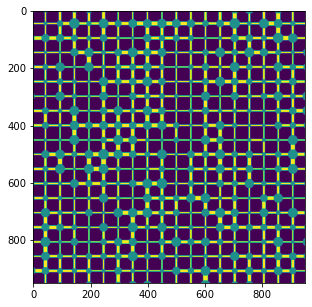

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(im[25:-25, 25:-25, 18].T)

Next the snow algorithm is used to do network extraction on the tomography style image. Of course if you have your own tomogrpahy image this can be used instead.

In [7]:
crop = im[25:-25, 25:-25, :]
snow_out = ps.networks.snow2(crop > 0, voxel_size=4e-7)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Extracting pore and throat properties:   0%|          | 0/533 [00:00<?, ?it/s]

In [8]:
print(snow_out.regions.shape)

(956, 956, 23)


The SNOW algorithm provides a labelled region image containing the pore index. As zero is used for the background it is actually the pore index + 1 because python references arrays with first element as zero and we do not explicitly store the pore index.

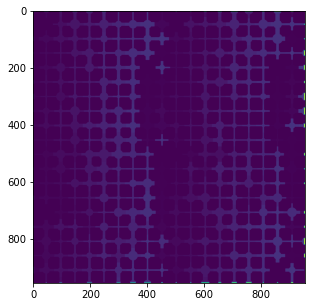

In [9]:
# NBVAL_IGNORE_OUTPUT
fig, ax = plt.subplots(figsize=(5, 5))
reg = snow_out.regions.astype(float) - 1
reg[reg == -1] = np.nan
region_slice = snow_out.regions[:, :, 18] - 1
mask = region_slice >= 0
ax.imshow(region_slice.T);

Now our new network is extracted we can fill a network object with all the properties and begin simulation.

In [10]:
wrk = op.Workspace()
wrk.clear()

In [11]:
net, geo = op.io.PoreSpy.import_data(snow_out.network)

AttributeError: module 'openpnm.io' has no attribute 'PoreSpy'

A helper function is defined for plotting a particular data set.

In [12]:
def update_image(data):
    data = data.astype(float)
    out_im = np.ones(region_slice.shape, dtype=float)*-1
    out_im[mask] = data[region_slice[mask]]
    out_im[~mask] = np.nan
    return out_im

AttributeError: 'NoneType' object has no attribute 'geometries'

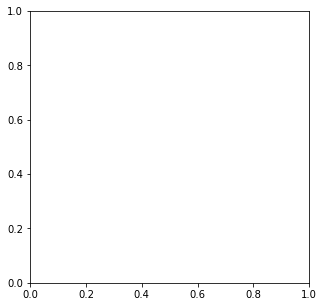

In [13]:
# NBVAL_IGNORE_OUTPUT
fig, ax = plt.subplots(figsize=(5, 5))
out = update_image(net['pore.diameter'])
ax.imshow(out.T);

Again, stadard physics is used to define the capillary entry pressures. And these are shown as a histogram for all the throats in the network.

In [14]:
water = op.phases.Water(network=net)
phys = op.physics.Basic(network=net, geometry=geo, phase=water)

AttributeError: module 'openpnm' has no attribute 'phases'

NameError: name 'phys' is not defined

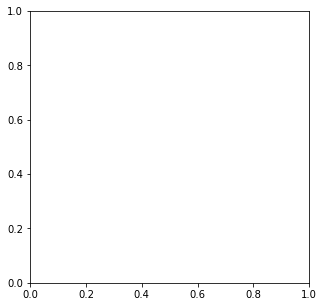

In [15]:
# NBVAL_IGNORE_OUTPUT
fig, ax = plt.subplots(figsize=[5, 5])
ax.hist(phys['throat.entry_pressure'], bins=10);

Next, the algorithm is defined and run with no arguments or outlets defined. This will proceed step by step assessing which pores are currently invaded (i.e. inlets first), which throats connect to an uninvaded pore and of these, which throat has the lowest capillary entry pressure for invasion. Invasion then proceeds along the path of least capillary resistance.

In [16]:
# NBVAL_IGNORE_OUTPUT
alg_ip = op.algorithms.InvasionPercolation(network=net, phase=water)
alg_ip.set_inlets(pores=net.pores('xmin'))
alg_ip.run()

NameError: name 'water' is not defined

NameError: name 'alg_ip' is not defined

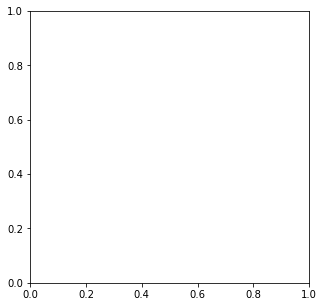

In [17]:
# NBVAL_IGNORE_OUTPUT
fig, ax = plt.subplots(figsize=(5, 5))
out = update_image(alg_ip['pore.invasion_sequence'])
plt.imshow(out.T);

In [18]:
def plot_invasion(seq):
    data = alg_ip['pore.invasion_sequence'] < seq
    fig, ax = plt.subplots(figsize=(5, 5))
    out = update_image(data)
    plt.imshow(out.T);

Using the slider below we can interactively plot the saturation at each invasion step (this works best using the left and right arrow keys).

In [19]:
max_seq = alg_ip['pore.invasion_sequence'].max()
interact(plot_invasion, seq=IntSlider(min=0, max=max_seq, step=1, value=200));

NameError: name 'alg_ip' is not defined

As with ``Ordinary Percolation`` we can plot a drainage or intrusion curve but this time the capillary pressure is plotted from one step to the next as a continuous process with dynamic pressure boundary conditions and so is allowed to increase and decrease to meet the next lowest entry pressure for the invading cluster.

NameError: name 'alg_ip' is not defined

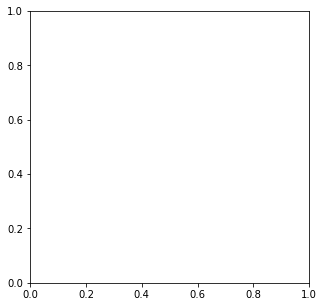

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
alg_ip.plot_intrusion_curve(ax)

We can compare the results of the two algorithms and see that the pressure envelope, i.e. maximum pressure reached historically by the invasion process is the same as the ordinary percolation value.

NameError: name 'water' is not defined

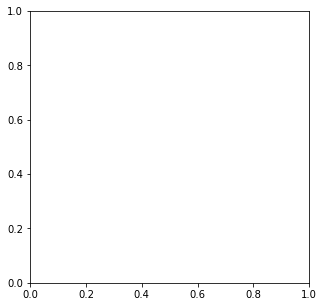

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))
alg_op = op.algorithms.OrdinaryPercolation(network=net, phase=water)
alg_op.set_inlets(net.pores('xmin'))
alg_op.settings._update({'pore_volume': 'pore.volume',
                         'throat_volume': 'throat.volume'})
alg_op.run(points=1000)
alg_op.plot_intrusion_curve(ax)
alg_ip.plot_intrusion_curve(ax)

An additional feature of the algorithm is the ability to identify where the defending phase becomes trapped. Whether this happens in reality in-fact relies on the connectivity of the defending phase and whether it can reside in the invaded pores as thin wetting films. If not then the defending phase is completely pushed out of a pore when invaded and it can become isolated and trapped when encircled by the invading phase. OpenPNM actually calculates this trapping as a post-process, employing some clever logic described by [Masson 2016](http://dx.doi.org/10.1016/j.cageo.2016.02.003).

In [22]:
alg_ip_t = op.algorithms.InvasionPercolation(network=net, phase=water)
alg_ip_t.set_inlets(pores=net.pores('xmin'))
alg_ip_t.run()
alg_ip_t.apply_trapping(outlets=net.pores(['boundary']))
fig, ax = plt.subplots(figsize=(5, 5))
out = update_image(alg_ip_t['pore.trapped'])
ax.imshow(out.T);

NameError: name 'water' is not defined

Here a reasonable fraction of the pore space is not invaded due to trapping of the defending phase. Generally this fraction will be lower in truly 3D networks as there are more routes out of the network because pores have higher connectivity. Also, typically if a defending phase is considered to be wetting then film flow is assumed to allow residual defending phase to escape. However, we can show the differences on one plot with and without trapping below.

NameError: name 'alg_ip' is not defined

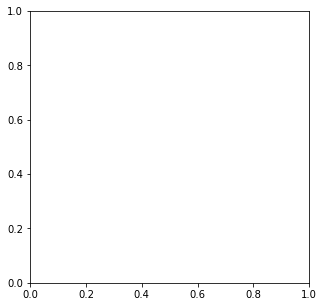

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
alg_ip.plot_intrusion_curve(ax)
alg_ip_t.plot_intrusion_curve(ax)